In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [3]:
train_df.shape

(430, 13)

In [4]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
train_df.shape

(335, 13)

In [8]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

In [10]:
X.head()

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History
0,0.0,1.0,6700,230.0,1.0
1,0.0,0.0,5316,136.0,1.0
2,0.0,1.0,3704,120.0,1.0
3,0.0,1.0,5821,144.0,1.0
5,0.0,1.0,3052,100.0,1.0


In [11]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: Loan_Status, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

In [14]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [15]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

In [17]:
# !pip install mlflow

In [18]:
import mlflow

In [19]:
# Create a new MLflow Experiment
mlflow.set_experiment("Loan_app")

2024/12/16 07:54:25 INFO mlflow.tracking.fluent: Experiment with name 'Loan_app' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/mohit/Documents/Scaler/Batches/MLOps-Dec24/Experiment-Tracking/mlruns/167461151080287011', creation_time=1734315865881, experiment_id='167461151080287011', last_update_time=1734315865881, lifecycle_stage='active', name='Loan_app', tags={}>

In [21]:
# Start an MLflow run
with mlflow.start_run():

    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("mlflow.runName", "first_run")
    
    # Log the hyperparameters
    mlflow.log_param('max_depth', 4)

    # Log the loss metric
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc',train_acc)

    mlflow.sklearn.log_model(model_rf, "my_model")

2024/12/16 07:59:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
!mlflow ui

[2024-12-16 08:01:08 +0530] [3651] [INFO] Starting gunicorn 23.0.0
[2024-12-16 08:01:08 +0530] [3651] [INFO] Listening at: http://127.0.0.1:5000 (3651)
[2024-12-16 08:01:08 +0530] [3651] [INFO] Using worker: sync
[2024-12-16 08:01:08 +0530] [3652] [INFO] Booting worker with pid: 3652
[2024-12-16 08:01:08 +0530] [3653] [INFO] Booting worker with pid: 3653
[2024-12-16 08:01:09 +0530] [3654] [INFO] Booting worker with pid: 3654
[2024-12-16 08:01:09 +0530] [3655] [INFO] Booting worker with pid: 3655
^C
[2024-12-16 08:04:39 +0530] [3651] [INFO] Handling signal: int
[2024-12-16 08:04:39 +0530] [3653] [INFO] Worker exiting (pid: 3653)
[2024-12-16 08:04:39 +0530] [3652] [INFO] Worker exiting (pid: 3652)
[2024-12-16 08:04:39 +0530] [3654] [INFO] Worker exiting (pid: 3654)
[2024-12-16 08:04:39 +0530] [3655] [INFO] Worker exiting (pid: 3655)


## New data


In [23]:
train_df = pd.read_csv('data_new.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
train_df.shape

(614, 13)

In [25]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

In [27]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((480, 5), (480,))

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [29]:
with mlflow.start_run():
    
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train) # trained on new data

    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName','new_data')
    
    mlflow.set_tag("Training Info", "data collection")
    
    mlflow.set_tag('data file','data_new.csv')
    
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    
    
    mlflow.sklearn.log_model(model_rf, "my_model")

2024/12/16 08:08:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [32]:
# !mlflow ui

In [33]:
!mlflow ui --host=localhost:5555

[2024-12-16 08:09:53 +0530] [3803] [INFO] Starting gunicorn 23.0.0
[2024-12-16 08:09:53 +0530] [3803] [INFO] Listening at: http://127.0.0.1:5555 (3803)
[2024-12-16 08:09:53 +0530] [3803] [INFO] Using worker: sync
[2024-12-16 08:09:53 +0530] [3804] [INFO] Booting worker with pid: 3804
[2024-12-16 08:09:53 +0530] [3806] [INFO] Booting worker with pid: 3806
[2024-12-16 08:09:53 +0530] [3807] [INFO] Booting worker with pid: 3807
[2024-12-16 08:09:53 +0530] [3808] [INFO] Booting worker with pid: 3808
^C
[2024-12-16 08:24:03 +0530] [3803] [INFO] Handling signal: int
[2024-12-16 08:24:04 +0530] [3804] [INFO] Worker exiting (pid: 3804)
[2024-12-16 08:24:04 +0530] [3806] [INFO] Worker exiting (pid: 3806)
[2024-12-16 08:24:04 +0530] [3808] [INFO] Worker exiting (pid: 3808)
[2024-12-16 08:24:04 +0530] [3807] [INFO] Worker exiting (pid: 3807)


In [34]:
def mlflow_runs(n_est, max_dep, i):
    
    # Start an MLflow run
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators = n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train) # new data
    
        pred_val = model_rf.predict(X_val)
        val_acc = accuracy_score(y_val, pred_val)
    
        pred_train = model_rf.predict(X_train)
        train_acc = accuracy_score(y_train, pred_train)
    
        # Set a tag that we can use to remind ourselves what this run was for
        run = "hyperparam_run_"+str(i)
        
        mlflow.set_tag("mlflow.runName", run)
        mlflow.set_tag('data file','data_new.csv')
        
        # Log the hyperparameters
        mlflow.log_param('max_depth', max_dep)
        mlflow.log_param('n_estimators', n_est)

        # Log the perf metric
        mlflow.log_metric('val_acc', val_acc)
        mlflow.log_metric('train_acc',train_acc)
    
        mlflow.sklearn.log_model(model_rf, "my_model")

In [35]:
# n_estimators = [10,20,40]
# n_depth = [2, 4,8]

mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

2024/12/16 08:26:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/16 08:26:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/16 08:26:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/16 08:26:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/16 08:26:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/16 08:26:37 

In [36]:
!mlflow ui --host=localhost:5555

[2024-12-16 08:26:57 +0530] [3921] [INFO] Starting gunicorn 23.0.0
[2024-12-16 08:26:57 +0530] [3921] [INFO] Listening at: http://127.0.0.1:5555 (3921)
[2024-12-16 08:26:57 +0530] [3921] [INFO] Using worker: sync
[2024-12-16 08:26:57 +0530] [3922] [INFO] Booting worker with pid: 3922
[2024-12-16 08:26:57 +0530] [3923] [INFO] Booting worker with pid: 3923
[2024-12-16 08:26:57 +0530] [3924] [INFO] Booting worker with pid: 3924
[2024-12-16 08:26:57 +0530] [3925] [INFO] Booting worker with pid: 3925
^C
[2024-12-16 08:35:54 +0530] [3921] [INFO] Handling signal: int
[2024-12-16 08:35:54 +0530] [3924] [INFO] Worker exiting (pid: 3924)
[2024-12-16 08:35:54 +0530] [3923] [INFO] Worker exiting (pid: 3923)
[2024-12-16 08:35:54 +0530] [3922] [INFO] Worker exiting (pid: 3922)
[2024-12-16 08:35:54 +0530] [3925] [INFO] Worker exiting (pid: 3925)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

2024/12/16 08:36:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


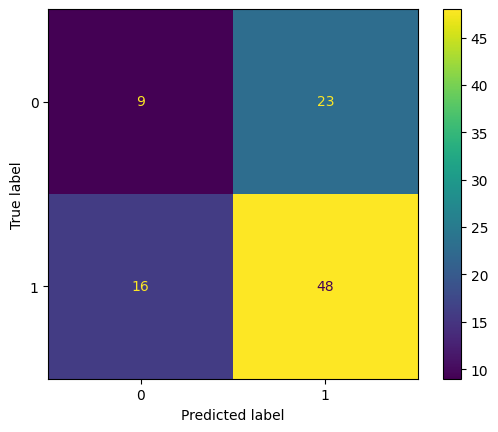

In [39]:

with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)


    mlflow.set_tag('mlflow.runName',"kNN")
    mlflow.log_param('neighbors',3)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(model_rf, "my_model")

In [40]:
!mlflow ui --host=localhost:5555

[2024-12-16 08:36:26 +0530] [4073] [INFO] Starting gunicorn 23.0.0
[2024-12-16 08:36:26 +0530] [4073] [INFO] Listening at: http://127.0.0.1:5555 (4073)
[2024-12-16 08:36:26 +0530] [4073] [INFO] Using worker: sync
[2024-12-16 08:36:26 +0530] [4074] [INFO] Booting worker with pid: 4074
[2024-12-16 08:36:26 +0530] [4075] [INFO] Booting worker with pid: 4075
[2024-12-16 08:36:26 +0530] [4076] [INFO] Booting worker with pid: 4076
[2024-12-16 08:36:26 +0530] [4077] [INFO] Booting worker with pid: 4077
^C
[2024-12-16 08:38:32 +0530] [4073] [INFO] Handling signal: int
[2024-12-16 08:38:32 +0530] [4077] [INFO] Worker exiting (pid: 4077)
[2024-12-16 08:38:32 +0530] [4076] [INFO] Worker exiting (pid: 4076)
[2024-12-16 08:38:32 +0530] [4075] [INFO] Worker exiting (pid: 4075)
[2024-12-16 08:38:32 +0530] [4074] [INFO] Worker exiting (pid: 4074)
